In [28]:
import pandas as pd
import numpy as np

def read_file(file_path):
    df = pd.read_csv(file_path, sep='\t')
    return df

df = read_file('window_size_affect/whole_process_window_size_affect.tsv')
df.head()

,exp_name,num_models,model_groups_num,num_devices,num_devices_per_node,mem_budget,total_rate,rate_distribution,arrival_process,arrival_process_kwargs,slo_scale,duration,policy_name,placement,goodput,mode,solver_time
0,goodput_vs_num_devices,12,2,16,4,13958643712,10,power_law,whole_process,"{'cv': 4, 'interval_seconds': 60, 'rate_scale'...",5,10800,dqn-dynamic,ModelPlacementWithReplacement(num_segments=4),0.894,simulate,0.001
1,goodput_vs_num_devices,12,2,16,4,13958643712,10,power_law,whole_process,"{'cv': 4, 'interval_seconds': 60, 'rate_scale'...",5,10800,dqn-dynamic,ModelPlacementWithReplacement(num_segments=2),0.921,simulate,0.001
2,goodput_vs_num_devices,12,2,16,4,13958643712,10,power_law,whole_process,"{'cv': 4, 'interval_seconds': 60, 'rate_scale'...",5,10800,dqn-dynamic,ModelPlacementWithReplacement(num_segments=2),0.900,simulate,0.001
3,goodput_vs_num_devices,12,2,16,4,13958643712,10,power_law,whole_process,"{'cv': 4, 'interval_seconds': 60, 'rate_scale'...",5,10800,dqn-dynamic,ModelPlacementWithReplacement(num_segments=2),0.873,simulate,0.001
4,goodput_vs_num_devices,12,2,16,4,13958643712,10,power_law,whole_process,"{'cv': 4, 'interval_seconds': 60, 'rate_scale'...",5,10800,dqn-dynamic,ModelPlacementWithReplacement(num_segments=2),0.819,simulate,0.001


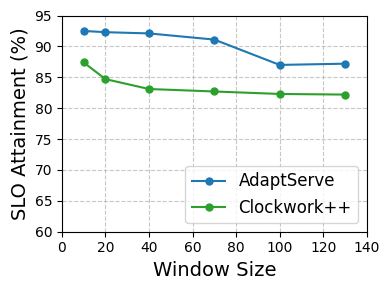

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# window_size = [25, 50, 100, 150, 200, 300, 400, 500, 600]
# dqn_slo_attainment = [0.923, 0.898, 0.899, 0.873, 0.798, 0.737, 0.525, 0.366, 0.441]
# sr_slo_attainment = [0.843, 0.827, 0.823, 0.822, 0.82, 0.818, 0.818, 0.816, 0.817]
window_size = [10, 20, 40, 70, 100, 130]
dqn_slo_attainment = [0.925, 0.923, 0.921, 0.911, 0.87, 0.872]
sr_slo_attainment = [0.874, 0.847, 0.831, 0.827, 0.823, 0.822]

# 换成百分比
dqn_slo_attainment = np.array(dqn_slo_attainment) * 100
sr_slo_attainment = np.array(sr_slo_attainment) * 100

# 绘制折线图
plt.figure(figsize=(4, 3))

plt.plot(window_size, dqn_slo_attainment, label="AdaptServe", color='tab:blue', marker='o', markersize=5)
plt.plot(window_size, sr_slo_attainment, label="Clockwork++", color='tab:green', marker='o', markersize=5)

# 设置标签和标题
plt.xlabel("Window Size", fontsize=14)
plt.ylabel("SLO Attainment (%)", fontsize=14)
# plt.title("(a) Real model latency.", fontsize=16, loc='left')

# 设置图例
plt.legend(loc='lower right', fontsize=12)

# 设置网格
plt.grid(True, linestyle='--', alpha=0.7)

# 设置 x 和 y 轴范围
plt.xlim(0, 140)  # 修改为 600
plt.ylim(60, 95)    # 修改为 1

# 调整布局
plt.tight_layout()

# 保存图形
plt.savefig('window_size_affect.pdf')

# 显示图形
plt.show()
